# Workshop 1 - Setup the environment and Data Exploration

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Workshop-1---Setup-the-environment-and-Data-Exploration" data-toc-modified-id="Workshop-1---Setup-the-environment-and-Data-Exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Workshop 1 - Setup the environment and Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Setup-python-environment-with-VerticaPy-library" data-toc-modified-id="Setup-python-environment-with-VerticaPy-library-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup python environment with VerticaPy library</a></span><ul class="toc-item"><li><span><a href="#Create-python-environment:" data-toc-modified-id="Create-python-environment:-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Create python environment:</a></span><ul class="toc-item"><li><span><a href="#Connection-with-database" data-toc-modified-id="Connection-with-database-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Connection with database</a></span></li></ul></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Loading data</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Statistics" data-toc-modified-id="Statistics-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Statistics</a></span></li><li><span><a href="#Correlation-and-Dependency" data-toc-modified-id="Correlation-and-Dependency-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Correlation and Dependency</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Time-Series:-Correlation-and-Seasonality" data-toc-modified-id="Time-Series:-Correlation-and-Seasonality-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Time Series: Correlation and Seasonality</a></span></li></ul></li></ul></li></ul></div>

## Setup python environment with VerticaPy library

### Create python environment:
<div class="alert alert-block alert-info">
First step is to create a python environment in your machine following these steps:

* Open the Command Prompt, PwerShell, or terminal

* Create the environment: ```python3 -m venv venv_name```
* Activate the environment: ```venv_name\Scripts\activate```
* Install VerticaPy: ``` pip3 install verticapy[all]``` (with version 12 it is smooth)
</div>

For better experience we will use jupyter notebook.

* Install notebook in the environment: ```pip3 install jupyter```
* Add the venv_name as a jupyter kernel: ```ipython kernel install --name "local-venv" --user```

#### Connection with database
To start playing with the API we need to create a connection with database.


In [34]:
import verticapy as vp
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext verticapy.sql

The verticapy.sql extension is already loaded. To reload it, use:
  %reload_ext verticapy.sql


In [35]:
# Create new connection with database
vp.new_connection({"host": "localhost",
                   "port": "5433",
                   "database": "VMart",
                   "password": "",
                   "user": "dbadmin"},
                  name="tutorial_connection")

In [36]:
# Connect with the database
vp.connect("tutorial_connection")

### Loading data 

The central concept in our process is  [__vDataFrame__](https://www.vertica.com/python/workshop/introduction/vdf/index.php) which stands for __virtual DataFrame__. It makes us benefit from database features such as columnar and MPP architecture. We do not need to load data to memory, the data will stay in the database and push the computation into the database, vDataFrame is a logical relation to the tables.
There are many possibilities to create vDataFrame:
- Using an existing relation in the database
- Load external data to the database using read functions (it support different format: CSV, Avro, JSON,..)

We will explore both ways in the next code blocks.

,123pclassInt100%,123survivedInt100%,AbcVarchar(164)100%,AbcsexVarchar(20)100%,"123ageNumeric(6,3)80%",123sibspInt100%,123parchInt100%,AbcticketVarchar(36)100%,"123fareNumeric(10,5)99%",AbccabinVarchar(30)23%,AbcembarkedVarchar(20)99%,AbcboatVarchar(100)35%,123bodyInt9%,Abchome.destVarchar(100)57%
1,1,0,,female,2.0,1,2,113781,151.55,C22 C26,S,[null],[null],"Montreal, PQ / Chesterville, ON"
2,1,0,,male,30.0,1,2,113781,151.55,C22 C26,S,[null],135,"Montreal, PQ / Chesterville, ON"
3,1,0,,female,25.0,1,2,113781,151.55,C22 C26,S,[null],[null],"Montreal, PQ / Chesterville, ON"
4,1,0,,male,39.0,0,0,112050,0.0,A36,S,[null],[null],"Belfast, NI"
5,1,0,,male,71.0,0,0,PC 17609,49.5042,[null],C,[null],22,"Montevideo, Uruguay"
6,1,0,,male,47.0,1,0,PC 17757,227.525,C62 C64,C,[null],124,"New York, NY"
7,1,0,,male,[null],0,0,PC 17318,25.925,[null],S,[null],[null],"New York, NY"
8,1,0,,male,24.0,0,1,PC 17558,247.5208,B58 B60,C,[null],[null],"Montreal, PQ"
9,1,0,,male,36.0,0,0,13050,75.2417,C6,C,A,[null],"Winnipeg, MN"
10,1,0,,male,25.0,0,0,13905,26.0,[null],C,[null],148,"San Francisco, CA"

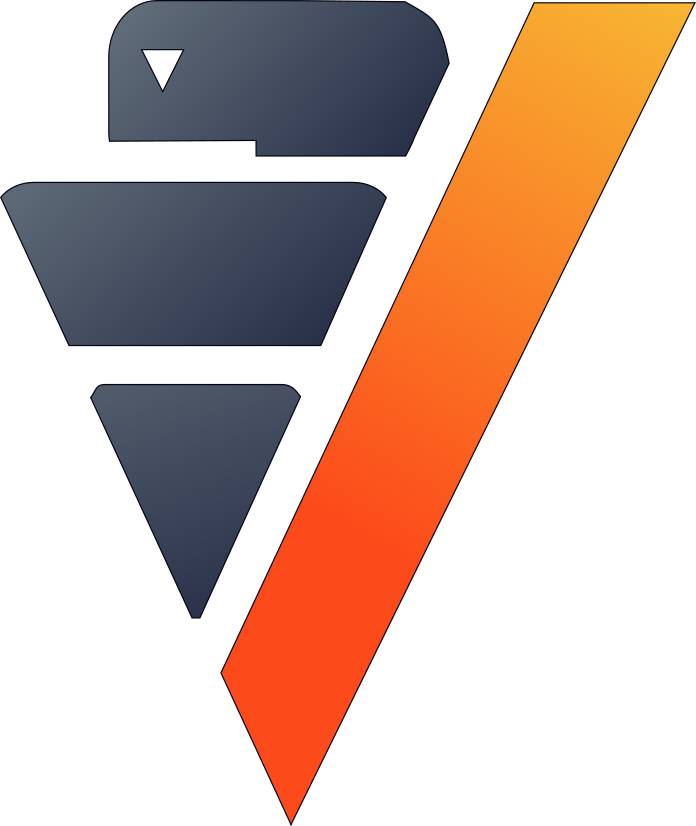

In [37]:
from verticapy.datasets import load_titanic
load_titanic()  # Loading the titanic dataset in Vertica
# titanic relation is already existed in database
titanic = vp.vDataFrame("public.titanic")
display(titanic)

<div class="alert alert-block alert-info">
We can use <a href="https://www.vertica.com/python/documentation_last/utilities/read_csv/" title="read_csv">read_csv</a> to load csv file to data base through VerticaPy.

```python
vp.read_csv('path/to/file.csv',
             table_name = 'file_data',
             schema='public')
```
This is done one time, it ingest the data into Vertica database.

To read it as vDataFrame, it only to call the relation:
```python
vdf = vp.vDataFrame("public.file_data")
```
There are other function such as <a href="https://www.vertica.com/python/documentation_last/utilities/read_json/index.php" title="read_json">read_json</a>, <a href="https://www.vertica.com/python/documentation_last/utilities/read_avro/index.php" title="read_avro">read_avro</a>, <a href="https://www.vertica.com/python/documentation_last/utilities/read_file/index.php" title="read_file">read_file</a>, and <a href="https://www.vertica.com/python/documentation_last/utilities/read_file/index.php" title="read_file">read_file</a>. For more information please check the documentation.

<span style="font-family:Comic Sans MS">For the sake of optimization, the awarness of data structure is prefarable to select the essential columns and data type using parameters like __usecols__ and <b>parse_nrows</b> .</span>
</div>

You can find the dataset [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [38]:
try:
    # read data
    vp.read_csv('data/churn.csv',
                table_name='churn',
                schema='public',
                parse_nrows=5000)
    # Read churn data from db
    churn_data = vp.vDataFrame('public.churn')
except:
    churn_data = vp.vDataFrame('public.churn')

## Data Exploration

### Statistics

The syntax of VerticaPy is similar to Pandas when you are dealing with vDataFrame. You can conduct descriptive statistics

,"123""pclass""Int100%","123""survived""Int100%","123""age""Numeric(6,3)80%","123""sibsp""Int100%","123""parch""Int100%","123""fare""Numeric(10,5)99%","123""body""Int9%","Abc""name""Varchar(164)100%","Abc""sex""Varchar(20)100%","Abc""ticket""Varchar(36)100%","Abc""cabin""Varchar(30)23%","Abc""embarked""Varchar(20)99%","Abc""boat""Varchar(100)35%","Abc""home.dest""Varchar(100)57%"
dtype,int,int,"numeric(6,3)",int,int,"numeric(10,5)",int,varchar(164),varchar(20),varchar(36),varchar(30),varchar(20),varchar(100),varchar(100)
percent,100.0,100.0,80.794,100.0,100.0,99.919,9.562,100.0,100.0,100.0,23.177,99.838,35.575,57.212
count,1234,1234,997,1234,1234,1233,118,1234,1234,1234,286,1232,439,706
top,3,0,[null],0,0,8.05,[null],"Kelly, Mr. James",male,CA. 2343,[null],S,[null],[null]
top_percent,53.728,63.533,19.206,67.747,76.904,4.7,90.438,0.162,65.964,0.81,76.823,70.746,64.425,42.788
avg,2.28444084278768,0.364667747163695,30.1524573721163,0.504051863857374,0.378444084278768,33.9637936739659,164.14406779661,26.5145867098865,4.6807131280389,6.80470016207455,3.72027972027972,1.0,1.47380410022779,19.0453257790368
stddev,0.842485636190292,0.481532018641288,14.4353046299159,1.04111727241629,0.868604707790392,52.6460729831293,96.5760207557808,9.18337285171824,0.948042321667023,2.80249175697261,2.28313602243069,0.0,0.63650147361905,8.83212620482592
min,1,0,0.33,0,0,0.0,1,12,4,3,1,1,1,5
approx_25%,1.0,0.0,21.0,0.0,0.0,7.8958,79.25,20,4,5,3,1,1,12
approx_50%,3.0,0.0,28.0,0.0,0.0,14.4542,160.5,25,4,6,3,1,1,17

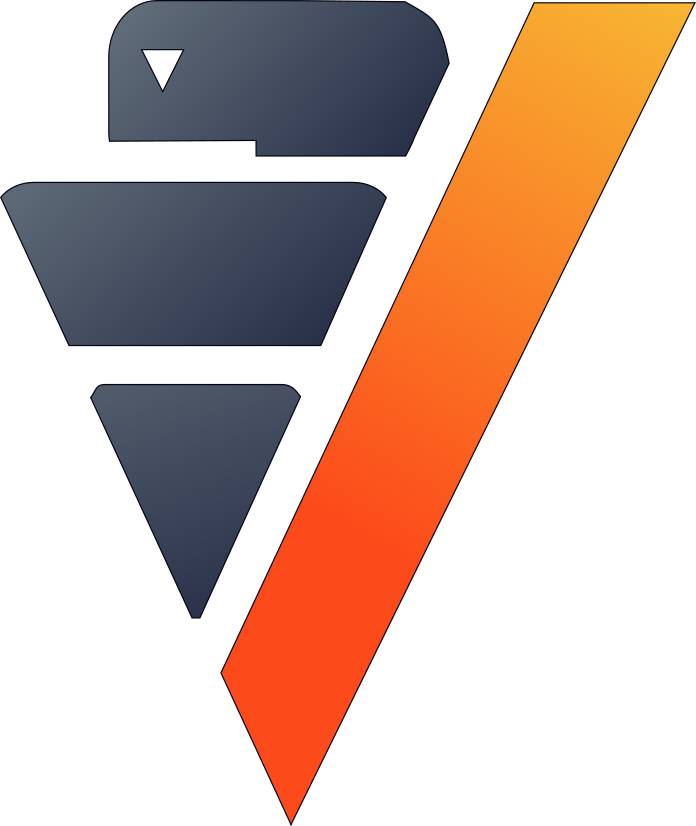

In [39]:
# Compute the statistics for numerical columns by default
titanic.describe(method='all')

[`agg`](https://www.vertica.com/python/documentation_last/vdataframe/main-methods/agg/index.php) provides a wide range of different aggregations.

,min,15%,95%,kurtosis,unique
"""pclass""",1.0,1.0,3.0,-1.34962169484619,3.0
"""survived""",0.0,0.0,1.0,-1.68576262213743,2.0
"""age""",0.33,18.0,57.0,0.15689691331997,96.0
"""sibsp""",0.0,0.0,2.0,19.2138853382802,7.0
"""parch""",0.0,0.0,2.0,22.6438022640172,8.0
"""fare""",0.0,7.75,134.5,26.2543152552867,277.0
"""body""",1.0,50.55,307.3,-1.23864914040606,118.0

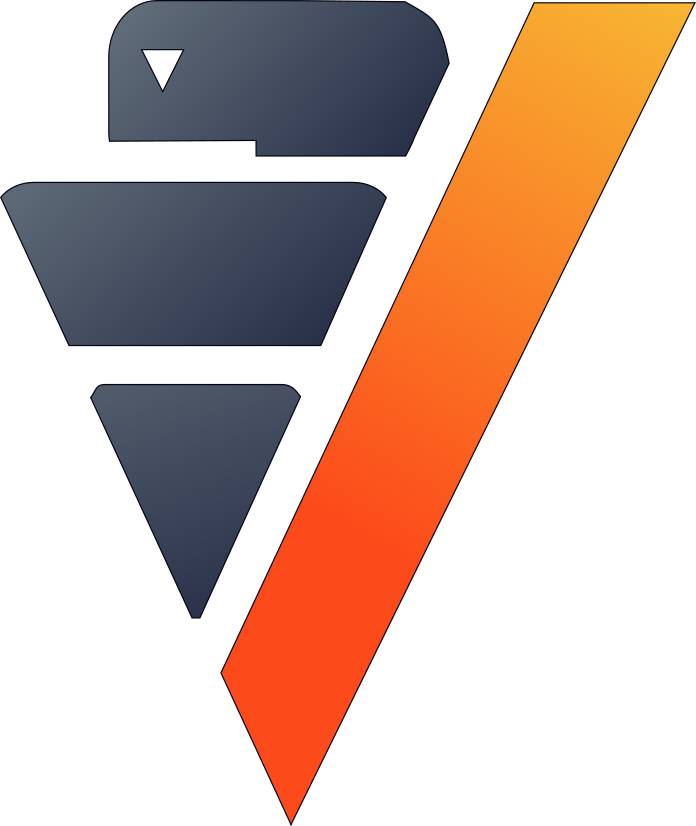

In [40]:
# For specific statistical quantities you can use agg function
titanic.agg(func=["min", "15%", "95%", "kurtosis", "unique"])

You can also group by a specific column or columns and perform aggregations and statistical computations

,AbcsexVarchar(20),123survivedInteger,123avg_ageFloat(22),123min_ageNumeric(8),123max_ageNumeric(8)
1,male,1,27.1693548387097,0.42,80.0
2,female,0,25.6098901098901,1.0,63.0
3,female,1,30.4266666666667,0.75,76.0
4,male,0,31.5312233009709,0.33,74.0

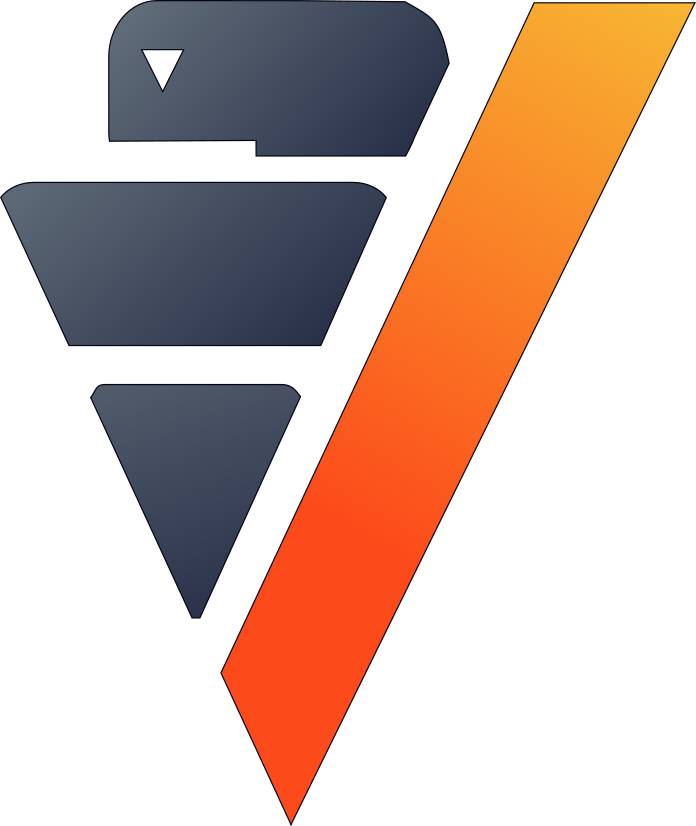

In [41]:
# with SQL way
titanic.groupby(columns=['sex', 'survived'],
               expr=['AVG(age) AS avg_age',
                    'MIN(age) AS min_age',
                    'MAX(age) AS max_age'])

### Correlation and Dependency

The correlation and dependency are finding the relation between the variables which is a very important task. Finding the relations between the variables is the main task of data science.  

Correlated variables can lead to skewed or misleading results, however, decision trees and boosted trees algorithms are immune by nature. 

,AbccustomerIDVarchar(20),AbcgenderVarchar(20),123SeniorCitizenInt,010PartnerBoolean,010DependentsBoolean,123tenureInt,010PhoneServiceBoolean,AbcMultipleLinesVarchar(100),AbcInternetServiceVarchar(22),AbcOnlineSecurityVarchar(38),AbcOnlineBackupVarchar(38),AbcDeviceProtectionVarchar(38),AbcTechSupportVarchar(38),AbcStreamingTVVarchar(38),AbcStreamingMoviesVarchar(38),AbcContractVarchar(28),010PaperlessBillingBoolean,AbcPaymentMethodVarchar(50),"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",010ChurnBoolean
1,0002-ORFBO,Female,0,✅,✅,9,✅,No,DSL,No,Yes,No,Yes,Yes,No,One year,✅,Mailed check,65.6,593.3,❌
2,0003-MKNFE,Male,0,❌,❌,9,✅,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,❌,Mailed check,59.9,542.4,❌
3,0004-TLHLJ,Male,0,❌,❌,4,✅,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,✅,Electronic check,73.9,280.85,✅

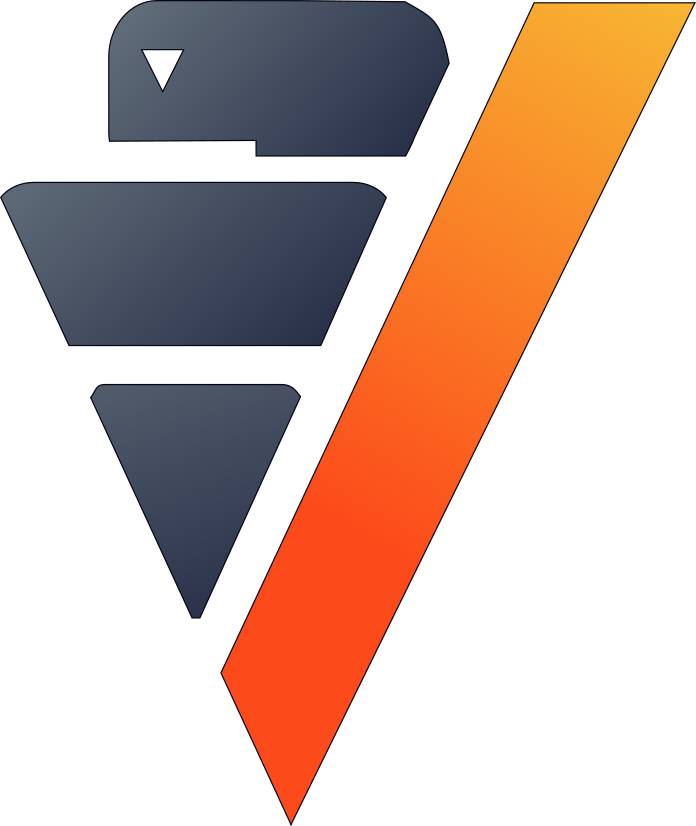

In [42]:
# display data
churn_data.head(3)

VerticaPy offers different types of correlation: `pearson`, `spearman`, `cramer`, and more.
Each type has it's specificity:
- pearson for linear corrlation (numerical variables)
- spearman rank correlation (numerical and categorical)
- cramer correlation between categorical variables

For more details please refer to his link [corr()](https://www.vertica.com/python/documentation_last/vdataframe/main-methods/corr/index.php). 

In [43]:
# select columns
num_cols = churn_data.numcol()
cat_clos = churn_data.catcol(max_cardinality=10)

,"""SeniorCitizen""","""Partner""","""Dependents""","""tenure""","""PhoneService""","""PaperlessBilling""","""MonthlyCharges""","""TotalCharges""","""Churn"""
"""SeniorCitizen""",1.0,0.0164786575974139,-0.211185088493958,0.0165668776818093,0.00857640107927944,0.156529559311173,0.220173338576274,0.102410605395332,0.150889328176473
"""Partner""",0.0164786575974139,1.0,0.452676282929464,0.379697461168293,0.017705663223972,-0.014876622287891,0.096847936256471,0.319072363238569,-0.150447544959177
"""Dependents""",-0.211185088493958,0.452676282929464,1.0,0.159712331216918,-0.00176167854468371,-0.111377229193644,-0.113890230021937,0.0646532494217718,-0.164221401579725
"""tenure""",0.0165668776818093,0.379697461168293,0.159712331216918,1.0,0.00844820673274375,0.00615248159827112,0.24789985628615,0.825880460933193,-0.352228670113078
"""PhoneService""",0.00857640107927944,0.017705663223972,-0.00176167854468371,0.00844820673274375,1.0,0.0165048057325697,0.24739796321414,0.113008260954741,0.0119419800290031
"""PaperlessBilling""",0.156529559311173,-0.014876622287891,-0.111377229193644,0.00615248159827112,0.0165048057325697,1.0,0.352149967795987,0.157829782865907,0.191825331666468
"""MonthlyCharges""",0.220173338576274,0.096847936256471,-0.113890230021937,0.24789985628615,0.24739796321414,0.352149967795987,1.0,0.651064803226215,0.193356422237847
"""TotalCharges""",0.102410605395332,0.319072363238569,0.0646532494217718,0.825880460933193,0.113008260954741,0.157829782865907,0.651064803226215,1.0,-0.199484083567563
"""Churn""",0.150889328176473,-0.150447544959177,-0.164221401579725,-0.352228670113078,0.0119419800290031,0.191825331666468,0.193356422237847,-0.199484083567563,1.0

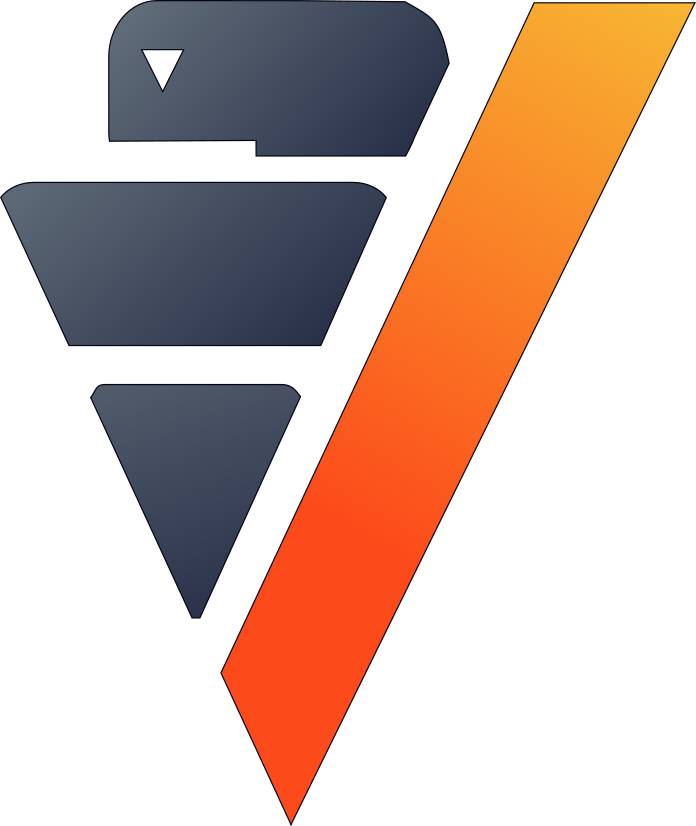

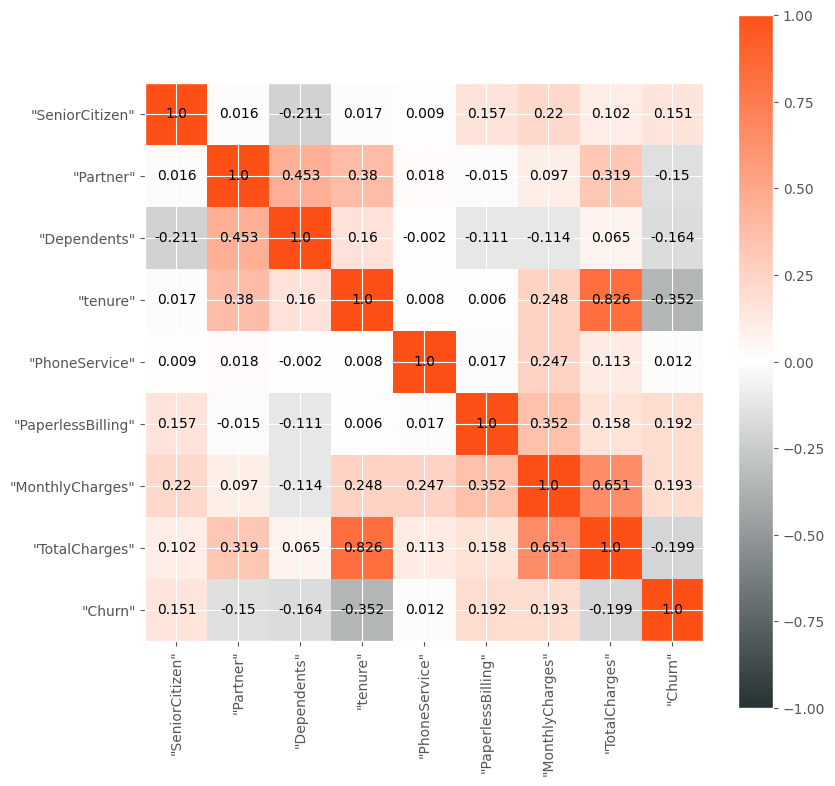

In [44]:
# Compute correlation
churn_data.corr(columns=num_cols,
                method='pearson')

  0%|          | 0/17 [00:00<?, ?it/s]

,"""customerID""","""gender""","""SeniorCitizen""","""Partner""","""Dependents""","""PhoneService""","""MultipleLines""","""InternetService""","""OnlineSecurity""","""OnlineBackup""","""DeviceProtection""","""TechSupport""","""StreamingTV""","""StreamingMovies""","""Contract""","""PaperlessBilling""","""PaymentMethod""","""Churn"""
"""customerID""",1,0.7071387759872941,0.8533988239339025,0.7075137962272524,0.7617937674788702,0.9083424868747245,0.8423185423961393,0.8241182589052664,0.8293968523170167,0.824052991235141,0.8241100151107151,0.8289549641545605,0.822756376161546,0.8227324857138872,0.8379652208984673,0.7190332195604549,0.8679291439283205,0.7810906445878953
"""gender""",0.7071387759872941,1,0.001873711638260736,0.001808079661789021,0.010516611922734077,0.006487672136208199,0.009451666570452976,0.011319816023820888,0.0170248673996952,0.013798357377745577,0.0060292442384310314,0.009722241217455355,0.008844328042668036,0.010640764864840464,0.008152557349604891,0.011753691221222193,0.01864584107758851,0.008612095078997812
"""SeniorCitizen""",0.8533988239339025,0.001873711638260736,1,0.016478657597413914,0.21118508849395765,0.008576401079279436,0.1466428981547604,0.26532401247490706,0.21107026551439387,0.18277371600205183,0.18307117871498424,0.22405049807030314,0.18558579209841322,0.18896193131088726,0.1438683664984389,0.15652955931117277,0.19598451589487909,0.1508893281764731
"""Partner""",0.7075137962272524,0.001808079661789021,0.016478657597413914,1,0.4526762829294638,0.017705663223972032,0.14389768511332032,0.0009073521208289714,0.1520098144303294,0.15333685221744686,0.16656826190673807,0.12764156082912625,0.13734265561456047,0.1295738983957767,0.29603947593743685,0.01487662228789104,0.16276227893705197,0.15044754495917656
"""Dependents""",0.7617937674788702,0.010516611922734077,0.21118508849395765,0.4526762829294638,1,0.0017616785446837105,0.025094016713979587,0.1802672478825538,0.19457924376849997,0.1627601413923546,0.15757010710298983,0.1823774404156106,0.14708243957321443,0.1413353739608838,0.24421223608441336,0.11137722919364426,0.15074411049283012,0.16422140157972528
"""PhoneService""",0.9083424868747245,0.006487672136208199,0.008576401079279436,0.017705663223972032,0.0017616785446837105,1,0.9083424868747245,0.3756877098193481,0.1004543340659466,0.09426132351692645,0.0933403708615453,0.10168502026979014,0.1075905732294665,0.10262843139014985,0.003976117347714681,0.01650480573256966,0.010297221766590077,0.01194198002900308
"""MultipleLines""",0.8423185423961393,0.009451666570452976,0.1466428981547604,0.14389768511332032,0.025094016713979587,0.9083424868747245,1,0.35442564054609377,0.20549824502887423,0.22274250160703957,0.22404038042422336,0.20611678556080693,0.24092390664877442,0.24153764189544388,0.08040766226914967,0.16634063233977742,0.1669298080382473,0.04010925283378872
"""InternetService""",0.8241182589052664,0.011319816023820888,0.26532401247490706,0.0009073521208289714,0.1802672478825538,0.3756877098193481,0.35442564054609377,1,0.5959261119397458,0.5747918951855748,0.5746979259753913,0.5940263647919771,0.5869475572452835,0.5856137246362116,0.20692091402897067,0.3784273654205174,0.3131230023778106,0.32245455521230887
"""OnlineSecurity""",0.8293968523170167,0.0170248673996952,0.21107026551439387,0.1520098144303294,0.19457924376849997,0.1004543340659466,0.20549824502887423,0.5959261119397458,1,0.5885783134226351,0.587182704257195,0.6063578188342443,0.575535268964284,0.5760517524952443,0.30134873250567035,0.34179975542511276,0.30495874601380435,0.3474004326740551
"""OnlineBackup""",0.824052991235141,0.013798357377745577,0.18277371600205183,0.15333685221744686,0.1627601413923546,0.09426132351692645,0.22274250160703957,0.5747918951855748,0.5885783134226351,1,0.5894213880027672,0.5902863075237831,0.5840131835568888,0.5827676397944742,0.2585717875284732,0.3210458207980537,0.282516640706162,0.2923155121954445

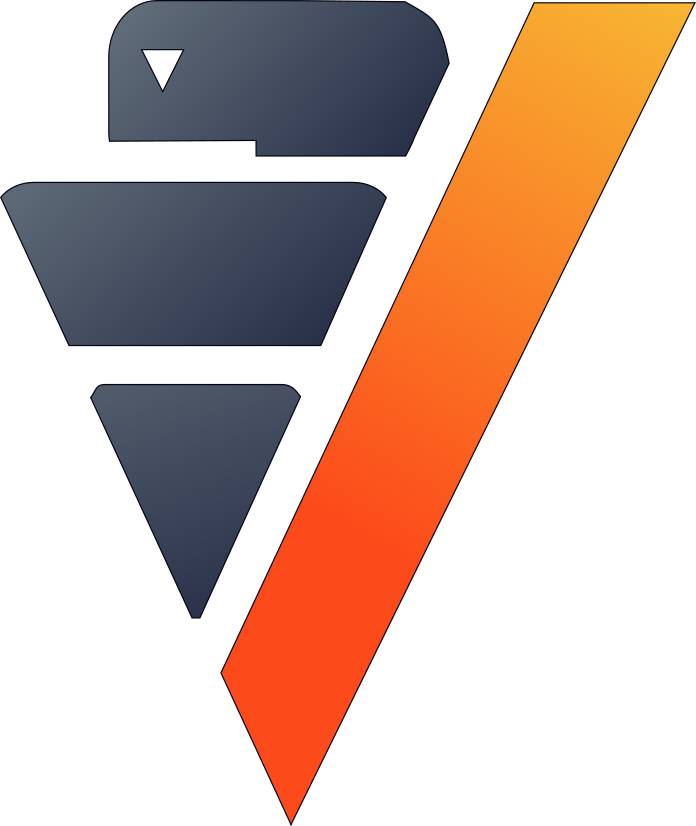

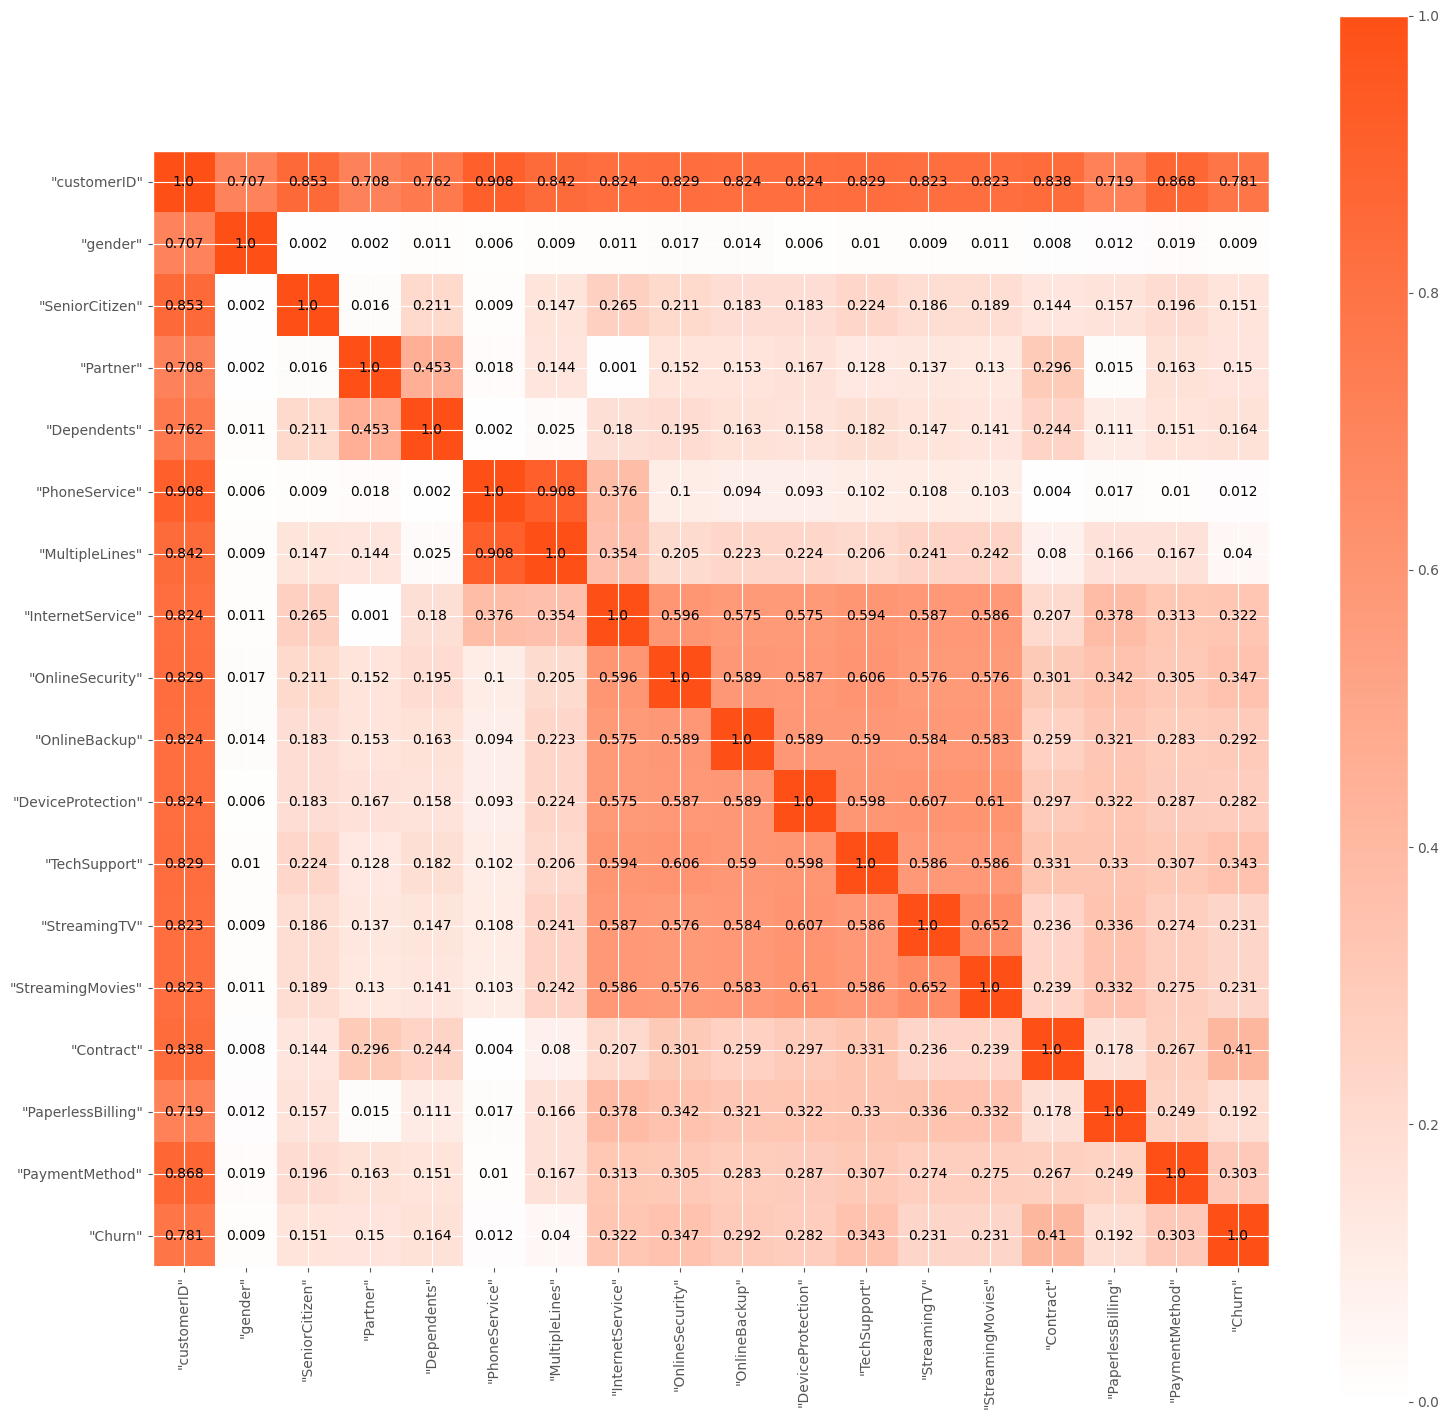

In [45]:
# correlation using cramer
churn_data.corr(columns=cat_clos,
                method='cramer')

You can also use the function to focus the correlation into one target

,"""Churn"""
"""Churn""",1
"""customerID""",0.7810906445878953
"""Contract""",0.4101156965761409
"""OnlineSecurity""",0.3474004326740551
"""TechSupport""",0.3429161982469257
"""InternetService""",0.32245455521230887
"""PaymentMethod""",0.3033586255540706
"""OnlineBackup""",0.2923155121954445
"""DeviceProtection""",0.281579732968073
"""StreamingMovies""",0.230950809069268

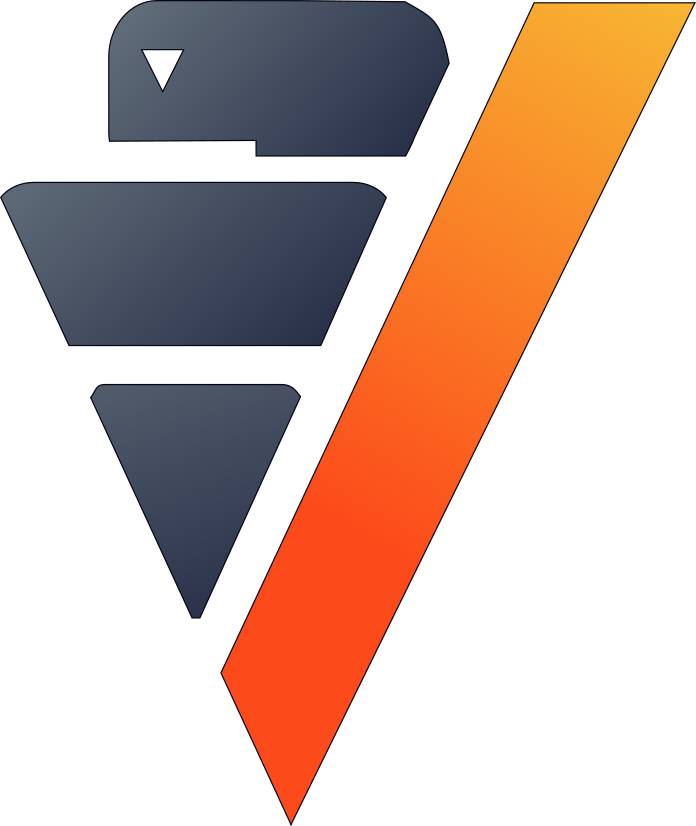

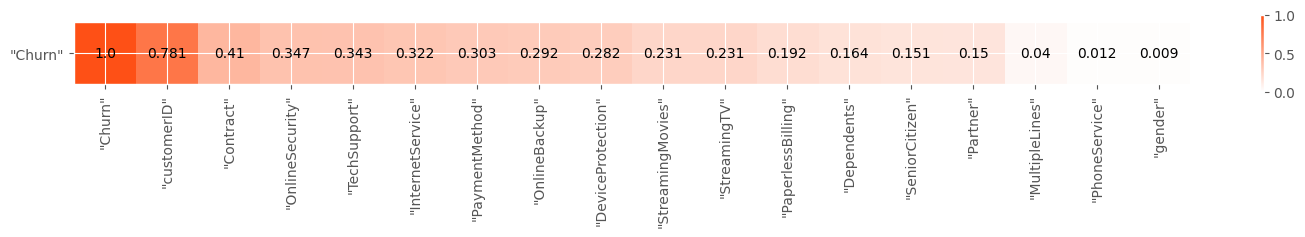

In [46]:
# Compute correlation between the target and the variables
churn_data.corr(method="cramer", focus="Churn")

### Data Visualization
One of the main tools for data exploration is charts. Using visualization will allow you to draw better conclusions and understanding of your data.

VerticaPy has integration with `matplotlib`  and `hightchart` libraries (in this section we will use only static charts) so you can have more flexibility using `matplotlib` parameters for better display.


For more details please check the [documentation](https://www.vertica.com/python/workshop/data_exploration/charts/index.php)

In [47]:
STYLE = 'ggplot'
COLOR = '#66b3ff'
# you can chooss the style
plt.style.use(STYLE)

<AxesSubplot:xlabel='"TotalCharges"', ylabel='Density'>

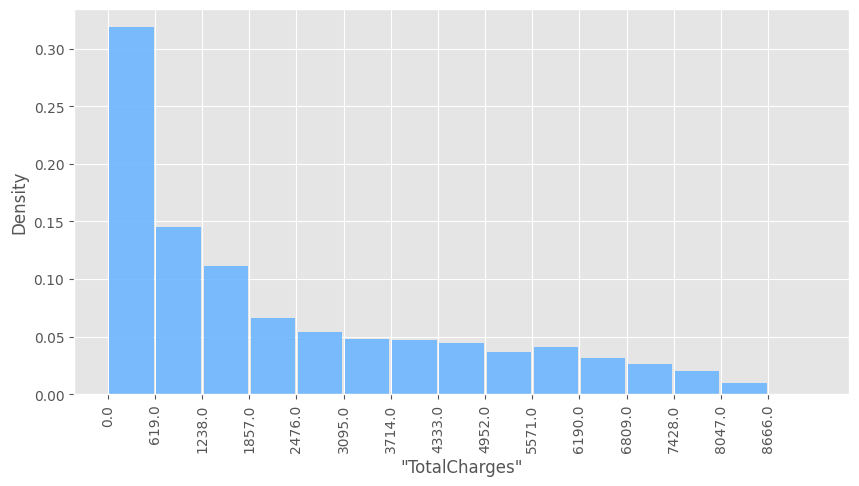

In [48]:
# customize the size of the plot
fig, ax = plt.subplots(figsize=(10, 5))
# Histogram
churn_data['TotalCharges'].hist(method='density',
                                color=COLOR,
                                ax=ax)

You can also use the aggregation for preticular column.

<AxesSubplot:xlabel='"Contract"', ylabel='avg("TotalCharges")'>

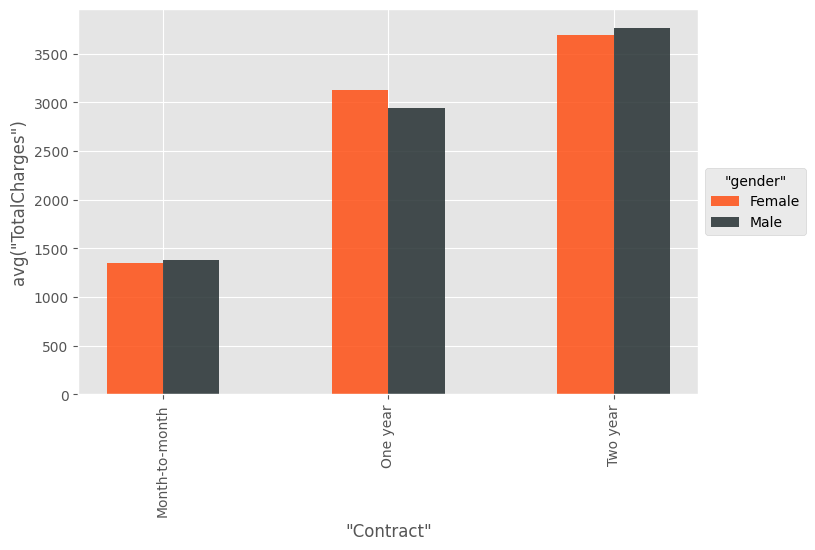

In [49]:
# customize the size of the plot
fig, ax = plt.subplots(figsize=(10, 5))

churn_data.hist(['contract', 'gender'],
                of='TotalCharges',
                method='avg',
                ax=ax
                )

In [50]:
# Additional parameters for pie charts
pie_kwds = {
    "colors": ['#ff9999', '#66b3ff'],
    "pctdistance": 0.2,
    "autopct": '%1.1f%%',
    "labeldistance": 0.6,
    "startangle": 45,
    "radius": 1.3,
}

<AxesSubplot:>

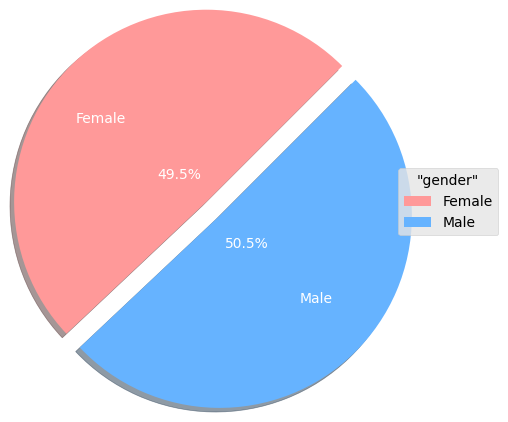

In [51]:
# Plot pie chart for gender
churn_data['gender'].pie(
    method="count",
    max_cardinality=10,
    pie_type="auto",  # auto,donut, rose
    **pie_kwds)

Scatter plot

<AxesSubplot:xlabel='"MonthlyCharges"', ylabel='"TotalCharges"'>

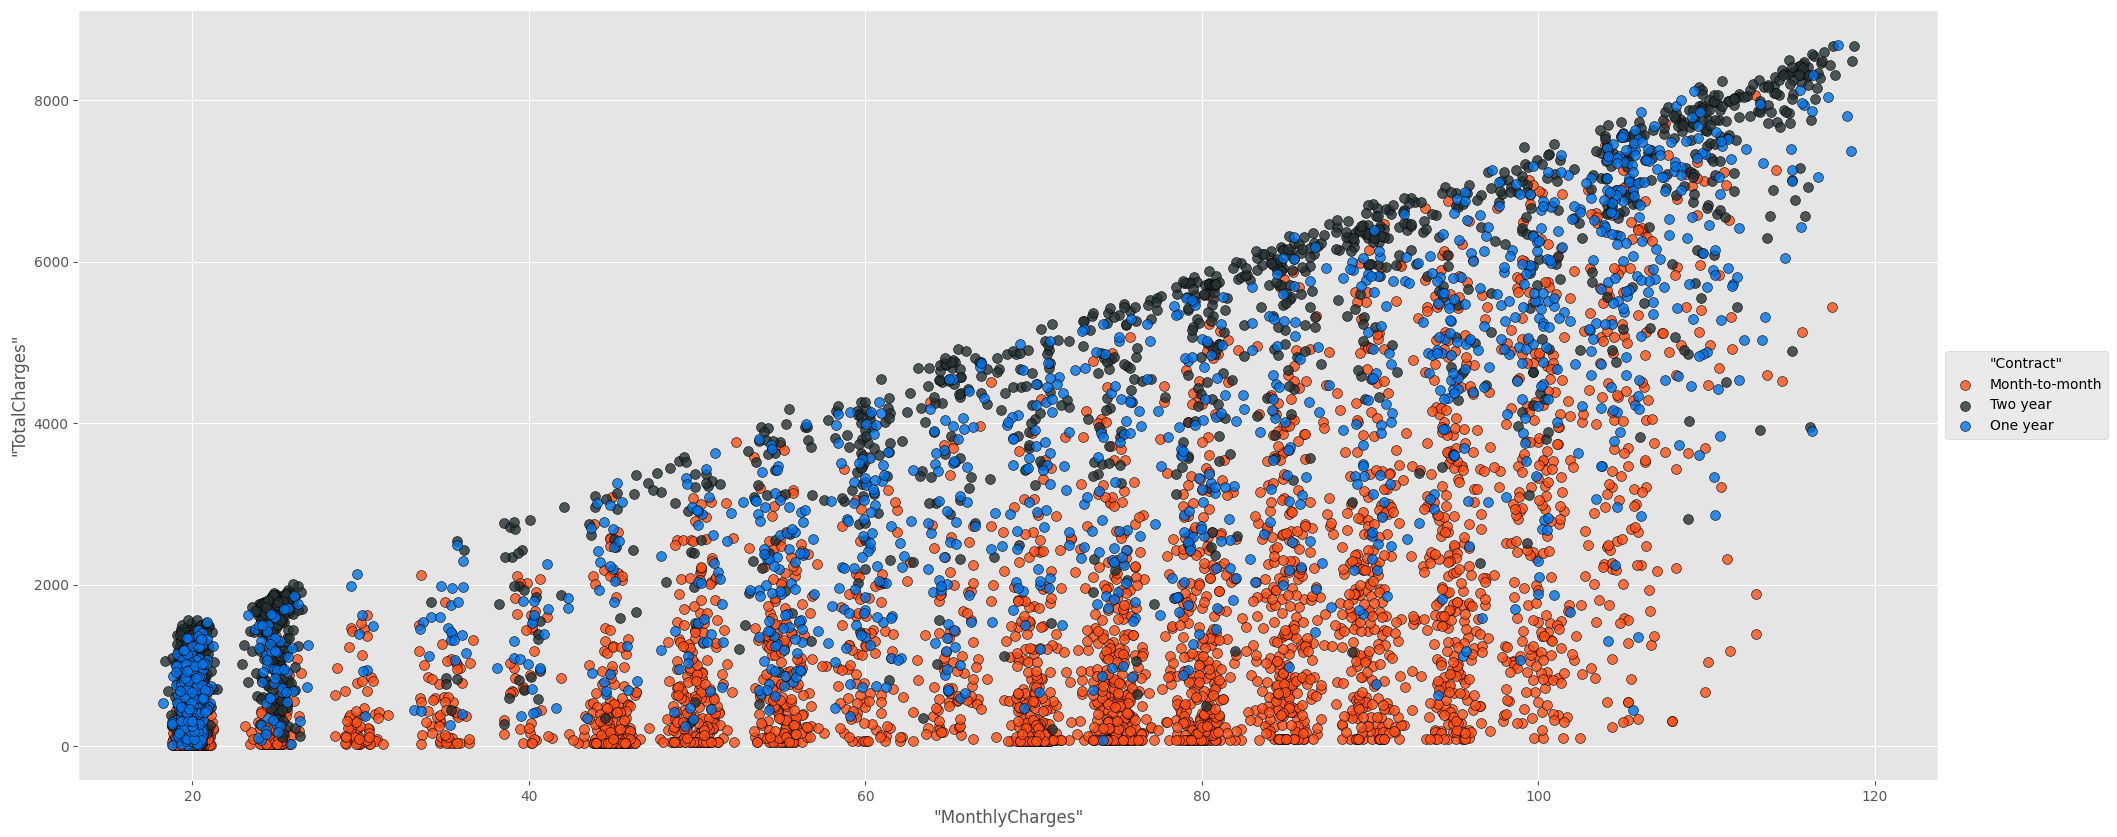

In [52]:
# set the axis
fig, ax = plt.subplots(figsize=(30, 10))
# Scatter plot
churn_data.scatter(['MonthlyCharges', 'TotalCharges'],
                   catcol="Contract",
                   max_cardinality=10,
                   cat_priority=[],
                   # True: aggregate the small representavive set, False will not aggregate them and not plot them
                   with_others=False,
                   dimensions=None,
                   ax=ax,)

Boxplot

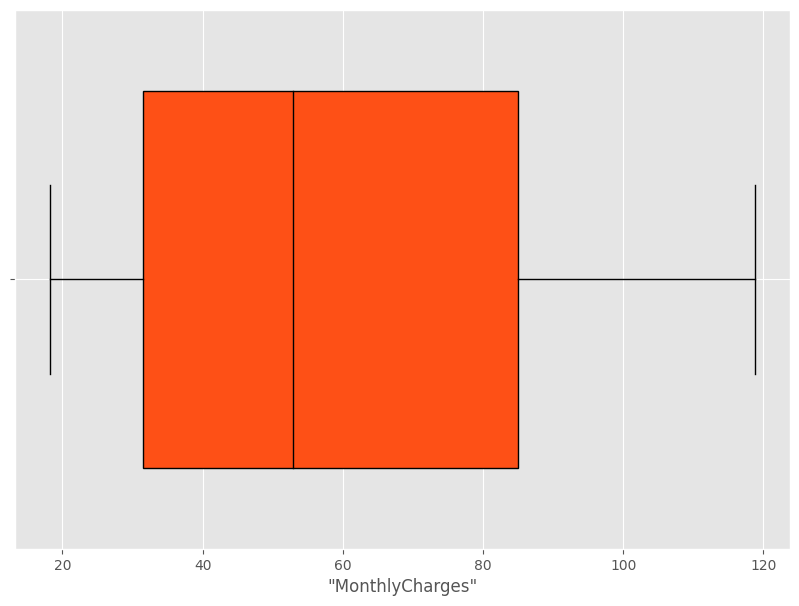

In [53]:
# set the axis
fig, ax = plt.subplots(figsize=(10, 7))
# boxplot
churn_data.boxplot(columns=['MonthlyCharges'],
                   ax=ax,
                   )

### Time Series: Correlation and Seasonality  

Investigating seasonality of the time series is very important because some models makes assumption about the stationarity of the data.

,📅dateDate,123GoldFloat,123OilFloat,123SpreadFloat,123VixFloat,123Dol_EurFloat,123SP500Float
1,1986-01-01,345.561363636364,22.9254545454545,1.05142857142857,18.1213636363636,1.12159999999858,211.779999
2,1986-02-01,339.0525,15.4547368421053,0.736842105263158,20.6242105263158,1.07880000000296,226.919998
3,1986-03-01,346.094736842105,12.6125,0.564,23.564,1.04850000000442,238.899994
4,1986-04-01,340.715909090909,12.8436363636364,0.604090909090909,23.0154545454545,1.05259999999544,235.520004
5,1986-05-01,342.325,15.377619047619,0.642380952380952,18.8875,1.03720000000612,247.350006
6,1986-06-01,342.797619047619,13.4257142857143,0.614761904761905,18.5980952380952,1.0399999999936,250.839996
7,1986-07-01,348.554347826087,11.5845454545455,0.636818181818182,19.6390909090909,1.01029999999446,236.119995
8,1986-08-01,376.29,15.0966666666667,0.83952380952381,18.6380952380952,0.979300000000876,252.929993
9,1986-09-01,418.152272727273,14.8666666666667,1.10142857142857,22.7052380952381,0.973200000000361,231.320007
10,1986-10-01,423.863043478261,14.8968181818182,1.14727272727273,22.5239130434783,0.961600000000544,243.979996

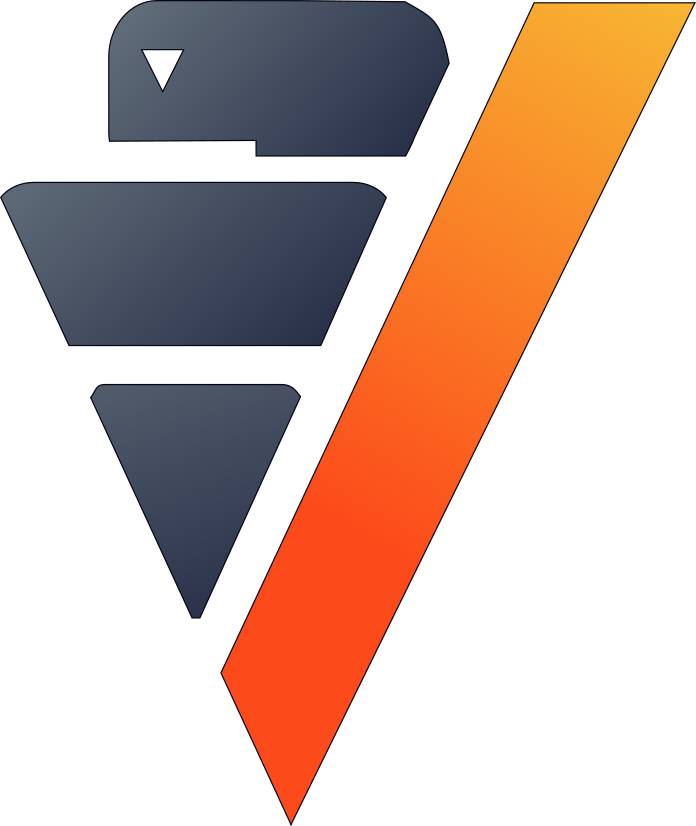

In [54]:
from verticapy.datasets import load_commodities
commodities = load_commodities()
display(commodities)

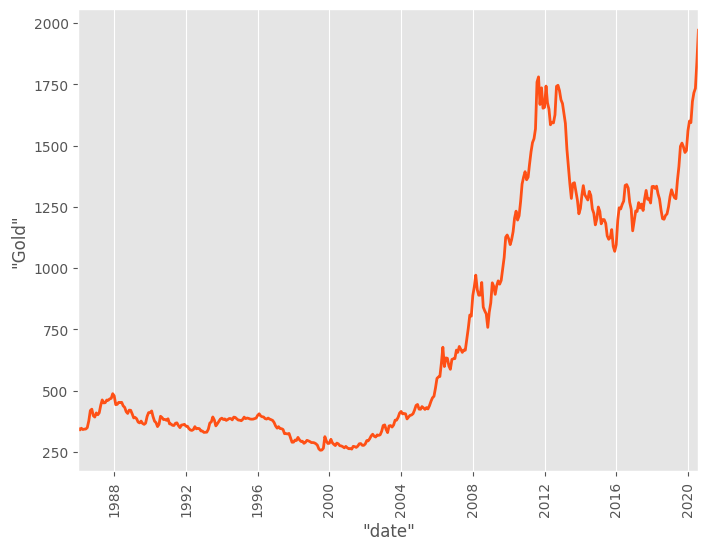

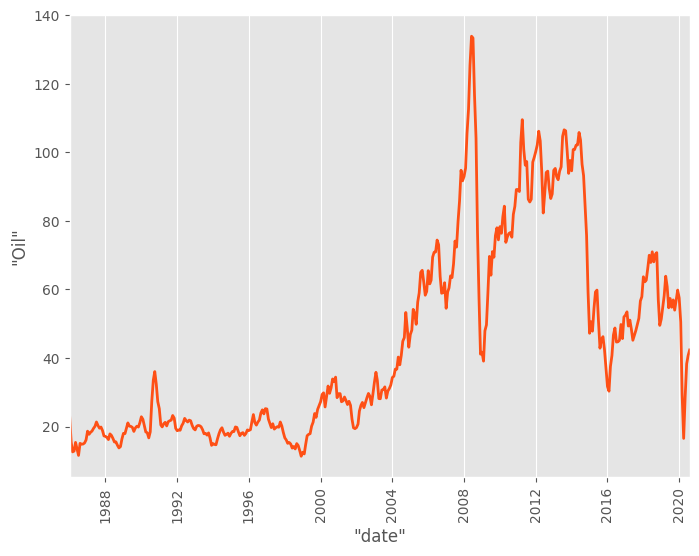

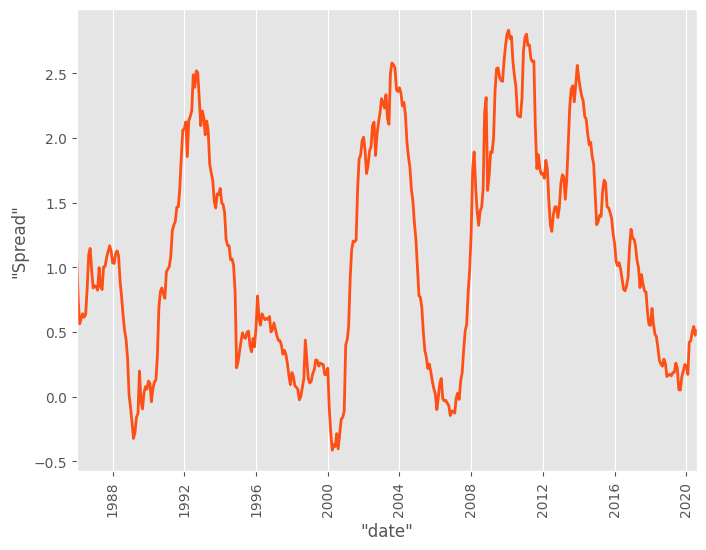

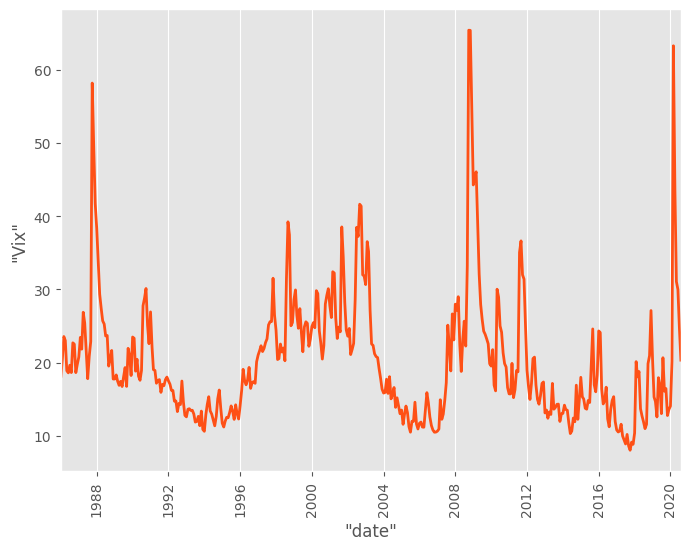

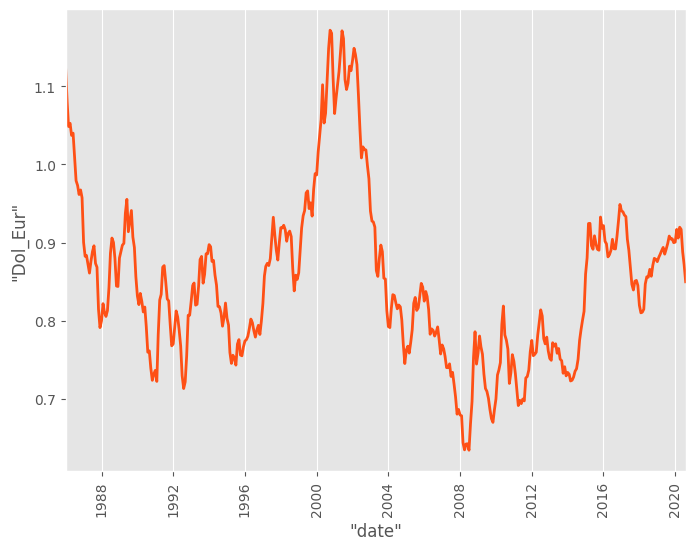

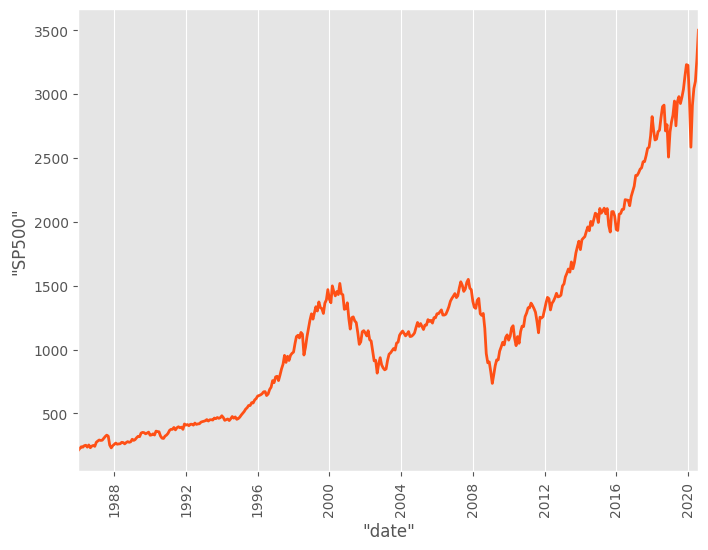

In [55]:
# plot Gold and Oil
for col in ['Gold', 'Oil', 'Spread', 'Vix', "Dol_Eur", 'SP500']:
    commodities.plot(ts='date', columns=col,)

The autocorrelation analysis helps in detecting hidden patterns and seasonality and in checking for randomness.

  0%|          | 0/41 [00:00<?, ?it/s]

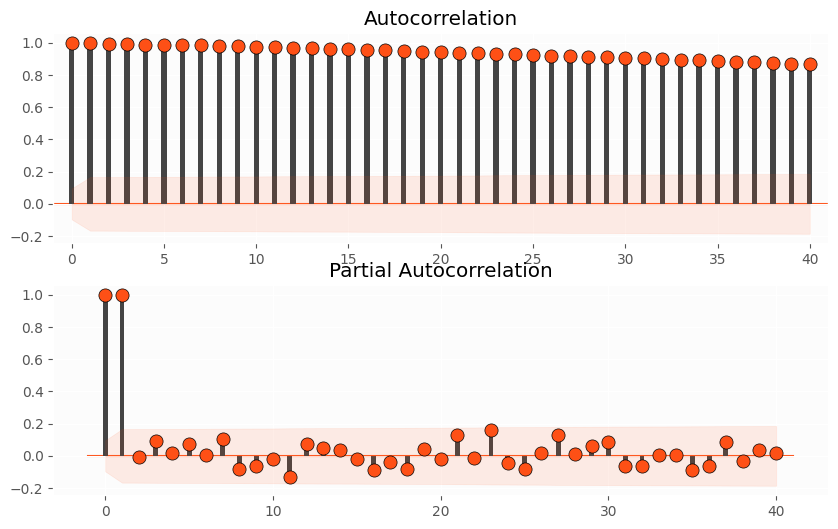

,acf,pacf,confidence
0,1.0,1.0,0.09609514041450774
1,0.997,0.996823952589872,0.1662894221070394
2,0.994,-0.00597481915081547,0.1664921231602554
3,0.991,0.093489978933617,0.16718055947060367
4,0.989,0.0180610163440547,0.1674014952283583
5,0.987,0.0723928922702552,0.16789702173983745
6,0.986,0.00497939254905395,0.1681030314550399
7,0.985,0.103304767278971,0.16890289669835765
8,0.982,-0.0805527682729035,0.16947064079989896
9,0.979,-0.0609275884224793,0.16988507407613215

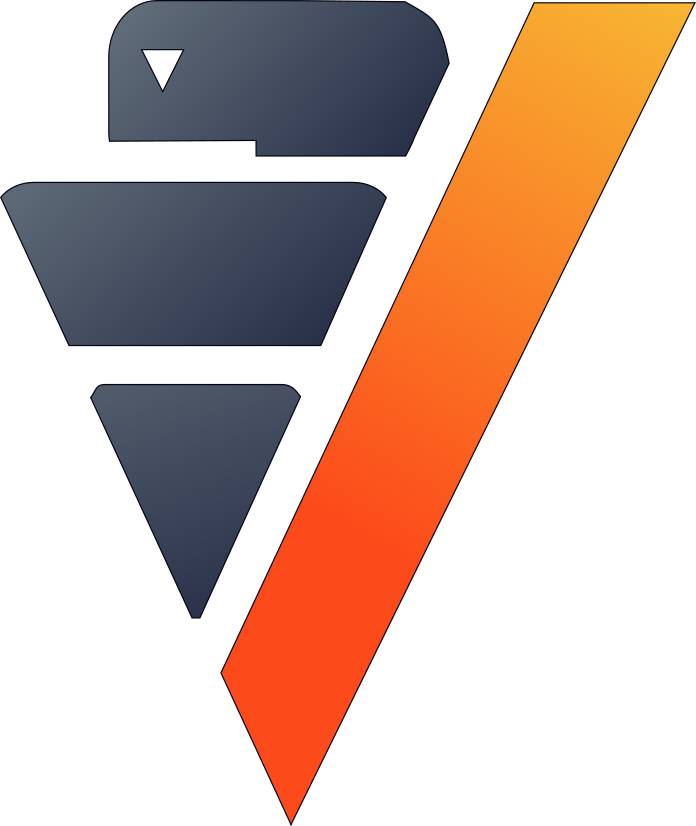

In [56]:
from verticapy.learn.model_selection import plot_acf_pacf
plot_acf_pacf(commodities,
              column="SP500",
              ts="date",
              p=40)